In [1]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt

In [2]:
user_info = pd.read_csv('C:/user_data.csv')
log_df = pd.read_csv("C:/logs.csv")

In [3]:
user_info.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [4]:
log_df.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [5]:
user_info.shape

(2954, 3)

In [6]:
log_df.shape

(4500, 4)

In [7]:
user_info.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [8]:
log_df.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
log_df.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [10]:
user_info.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
log_df.platform.nunique()

3

In [12]:
log_df.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [13]:
success_count_client = log_df.query('success == True')\
                                .groupby('client',as_index = False)\
                                .agg({'success':'count'})\
                                .sort_values('success',ascending=False)\
                                .rename(columns = {'success':'success_count'})

In [14]:
max_success_count_client = success_count_client.success_count.max()

In [15]:
succesfull_clients = success_count_client.query('success_count == @max_success_count_client').sort_values('client',ascending = True).client.tolist()

In [16]:
for client in succesfull_clients:
    print(client,end=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [17]:
', '.join([str(client) for client in succesfull_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [18]:
#второй способ Какой клиент совершил больше всего успешных операций?

In [19]:
success_count_client2 = log_df\
                                .groupby('client',as_index = False)\
                                .agg({'success':'sum'})\
                                .sort_values('success',ascending=False)\
                                .rename(columns = {'success':'success_count'})

In [20]:
max_success_count_client2 = success_count_client2.success_count.max()


In [21]:
succesfull_clients = success_count_client2.query('success_count == @max_success_count_client2').sort_values('client',ascending = True).client.tolist()

In [22]:
succesfull_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [23]:
#log_df.query('success == True').value_counts('client').reset_index()


In [24]:
#С какой платформы было совершено наибольшее количество успешных операций?

In [25]:
log_df.query('success == True').value_counts('platform')

platform
phone       2019
computer    1090
tablet       180
dtype: int64

In [26]:
total_df = user_info.merge(log_df, on = 'client')

In [27]:
total_df.query('premium == True').value_counts('platform')#.idxmax()

platform
phone       246
computer    150
tablet       24
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

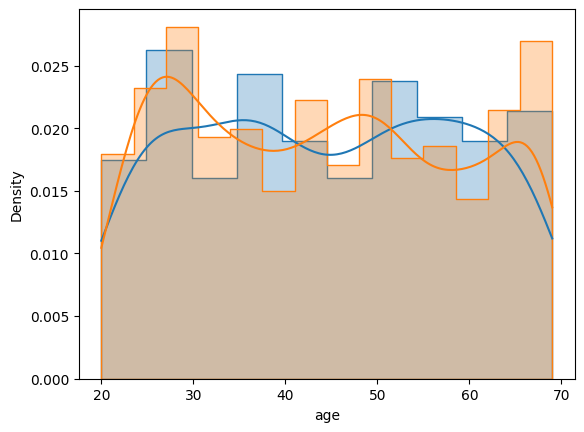

In [28]:
sns.histplot(total_df.query('premium == True').age,kde = True,stat="density",alpha = 0.3,element="step")
sns.histplot(total_df.query('premium == False').age,kde = True,stat="density",alpha = 0.3,element="step")

<Axes: xlabel='age', ylabel='Density'>

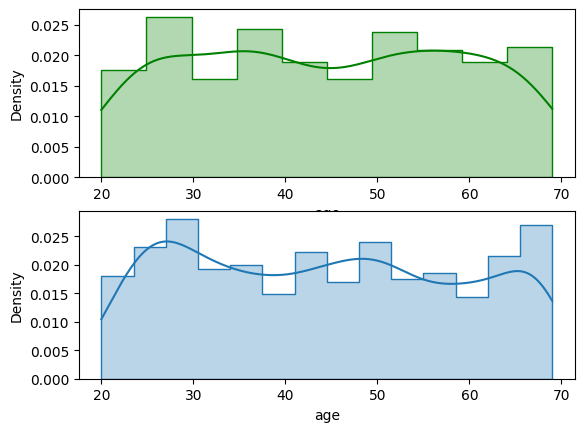

In [29]:
plt.subplot(2,1,1)
sns.histplot(total_df.query('premium == True').age,kde = True,stat="density",alpha = 0.3,element="step",color = 'green')

plt.subplot(2,1,2)
sns.histplot(total_df.query('premium == False').age,kde = True,stat="density",alpha = 0.3,element="step")

In [30]:
client_vs_success.value_counts()

NameError: name 'client_vs_success' is not defined

In [ ]:
client_vs_success = total_df.groupby('client').agg({'success':'sum'})

In [ ]:
sns.displot(client_vs_success,binwidth = 1)

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x='age',y='count',data=age_success_df)

In [ ]:
age_success_df = total_df.query('platform=="computer" & success == True').groupby('age',as_index=False).agg({'success':'sum'}).rename(columns={'success':'count'})

In [ ]:
comp = total_df.query('platform=="computer" & success == True')

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(comp,x='age')